# Analisis de trayectos recorridos entre estaciones

In [1]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

Para este analisis utilizaremos los archivos de Trips y Stations unicamente

In [2]:
trips = pd.read_csv('trip.csv', parse_dates=['start_date','end_date'], low_memory=False)

Dado que el analisis de valores nulos en los datos que utilizaremos se chequearon previamente, omitire ese analisis

In [3]:
stations = pd.read_csv('station.csv')

## Creo un DataFrame que contenga la estaciones de inicio y finalización de cada viaje, y además la latitud y longitud de cada estación donde se inició el viaje

In [4]:
#cambio en nombre para poder juntar los dataFrames
stations.rename(columns={'name': 'start_station_name'}, inplace=True)
geo_station_trips = pd.merge(trips,stations, on = ['start_station_name'], how = 'outer')
# Me quedo solo con las variables que necesito 
geo_station_trips = geo_station_trips[['start_station_name','end_station_name','lat','long']]

Agrego una columna para contar la cantidad de viajes a cada estación, partiendo de una estación determinada

In [5]:
geo_station_trips['cant'] = 1

In [6]:
trips_btw_stations = geo_station_trips.groupby(['lat','long','start_station_name', 'end_station_name'])\
                    [['cant']].sum().reset_index()
print(trips_btw_stations.head())

         lat        long                 start_station_name  \
0  37.329732 -121.901782  San Jose Diridon Caltrain Station   
1  37.329732 -121.901782  San Jose Diridon Caltrain Station   
2  37.329732 -121.901782  San Jose Diridon Caltrain Station   
3  37.329732 -121.901782  San Jose Diridon Caltrain Station   
4  37.329732 -121.901782  San Jose Diridon Caltrain Station   

           end_station_name  cant  
0          Adobe on Almaden   627  
1  Arena Green / SAP Center    35  
2      Cowper at University     1  
3                 Japantown   634  
4               MLK Library   808  


## Para tener una mejor idea de la geografia del lugar, ordenamos las estaciones de Norte a Sur y de Este a Oeste

In [8]:
#Estaciones arregladas de norte a sur y de oeste a este
stations = stations.sort_values(by = ['lat','long'],ascending=[False, True]).reset_index()

##  Creo una Matriz que contenga como indice y columnas los nombres de cada estación, para luego rellenar con los datos previamente obtenidos de la cantidad de viajes entre estaciones

In [9]:
columns = stations[['start_station_name']]
matrix = pd.DataFrame(index =columns, columns = columns)
matrix = matrix.fillna(0)

In [10]:
# Cargo los datos a la matriz
maxTripPos =  trips_btw_stations['cant'].argmax()
minTripPos =  trips_btw_stations['cant'].argmin()
for x in range(0, 1829):
        #Start Station
        pos_x = stations[stations['start_station_name'] == trips_btw_stations.iloc[x,2]].index.tolist()
        #End Station
        pos_y =  stations[stations['start_station_name'] == trips_btw_stations.iloc[x,3]].index.tolist()
        # Usando el valor comentado se podria normalizar
#         val = (trips_btw_stations.iloc[x,4] - trips_btw_stations['cant'].mean())\
#         / (trips_btw_stations.iloc[maxTripPos,4] - trips_btw_stations.iloc[minTripPos,4])
        val = trips_btw_stations.iloc[x,4]
        matrix.iloc[pos_x,pos_y] = val
        if (val <= 0) : matrix.iloc[pos_x,pos_y] = 0

## Muestro el resultado en un HeatMap siendo las estaciones sobre el eje Y las estaciones de inicio del viaje

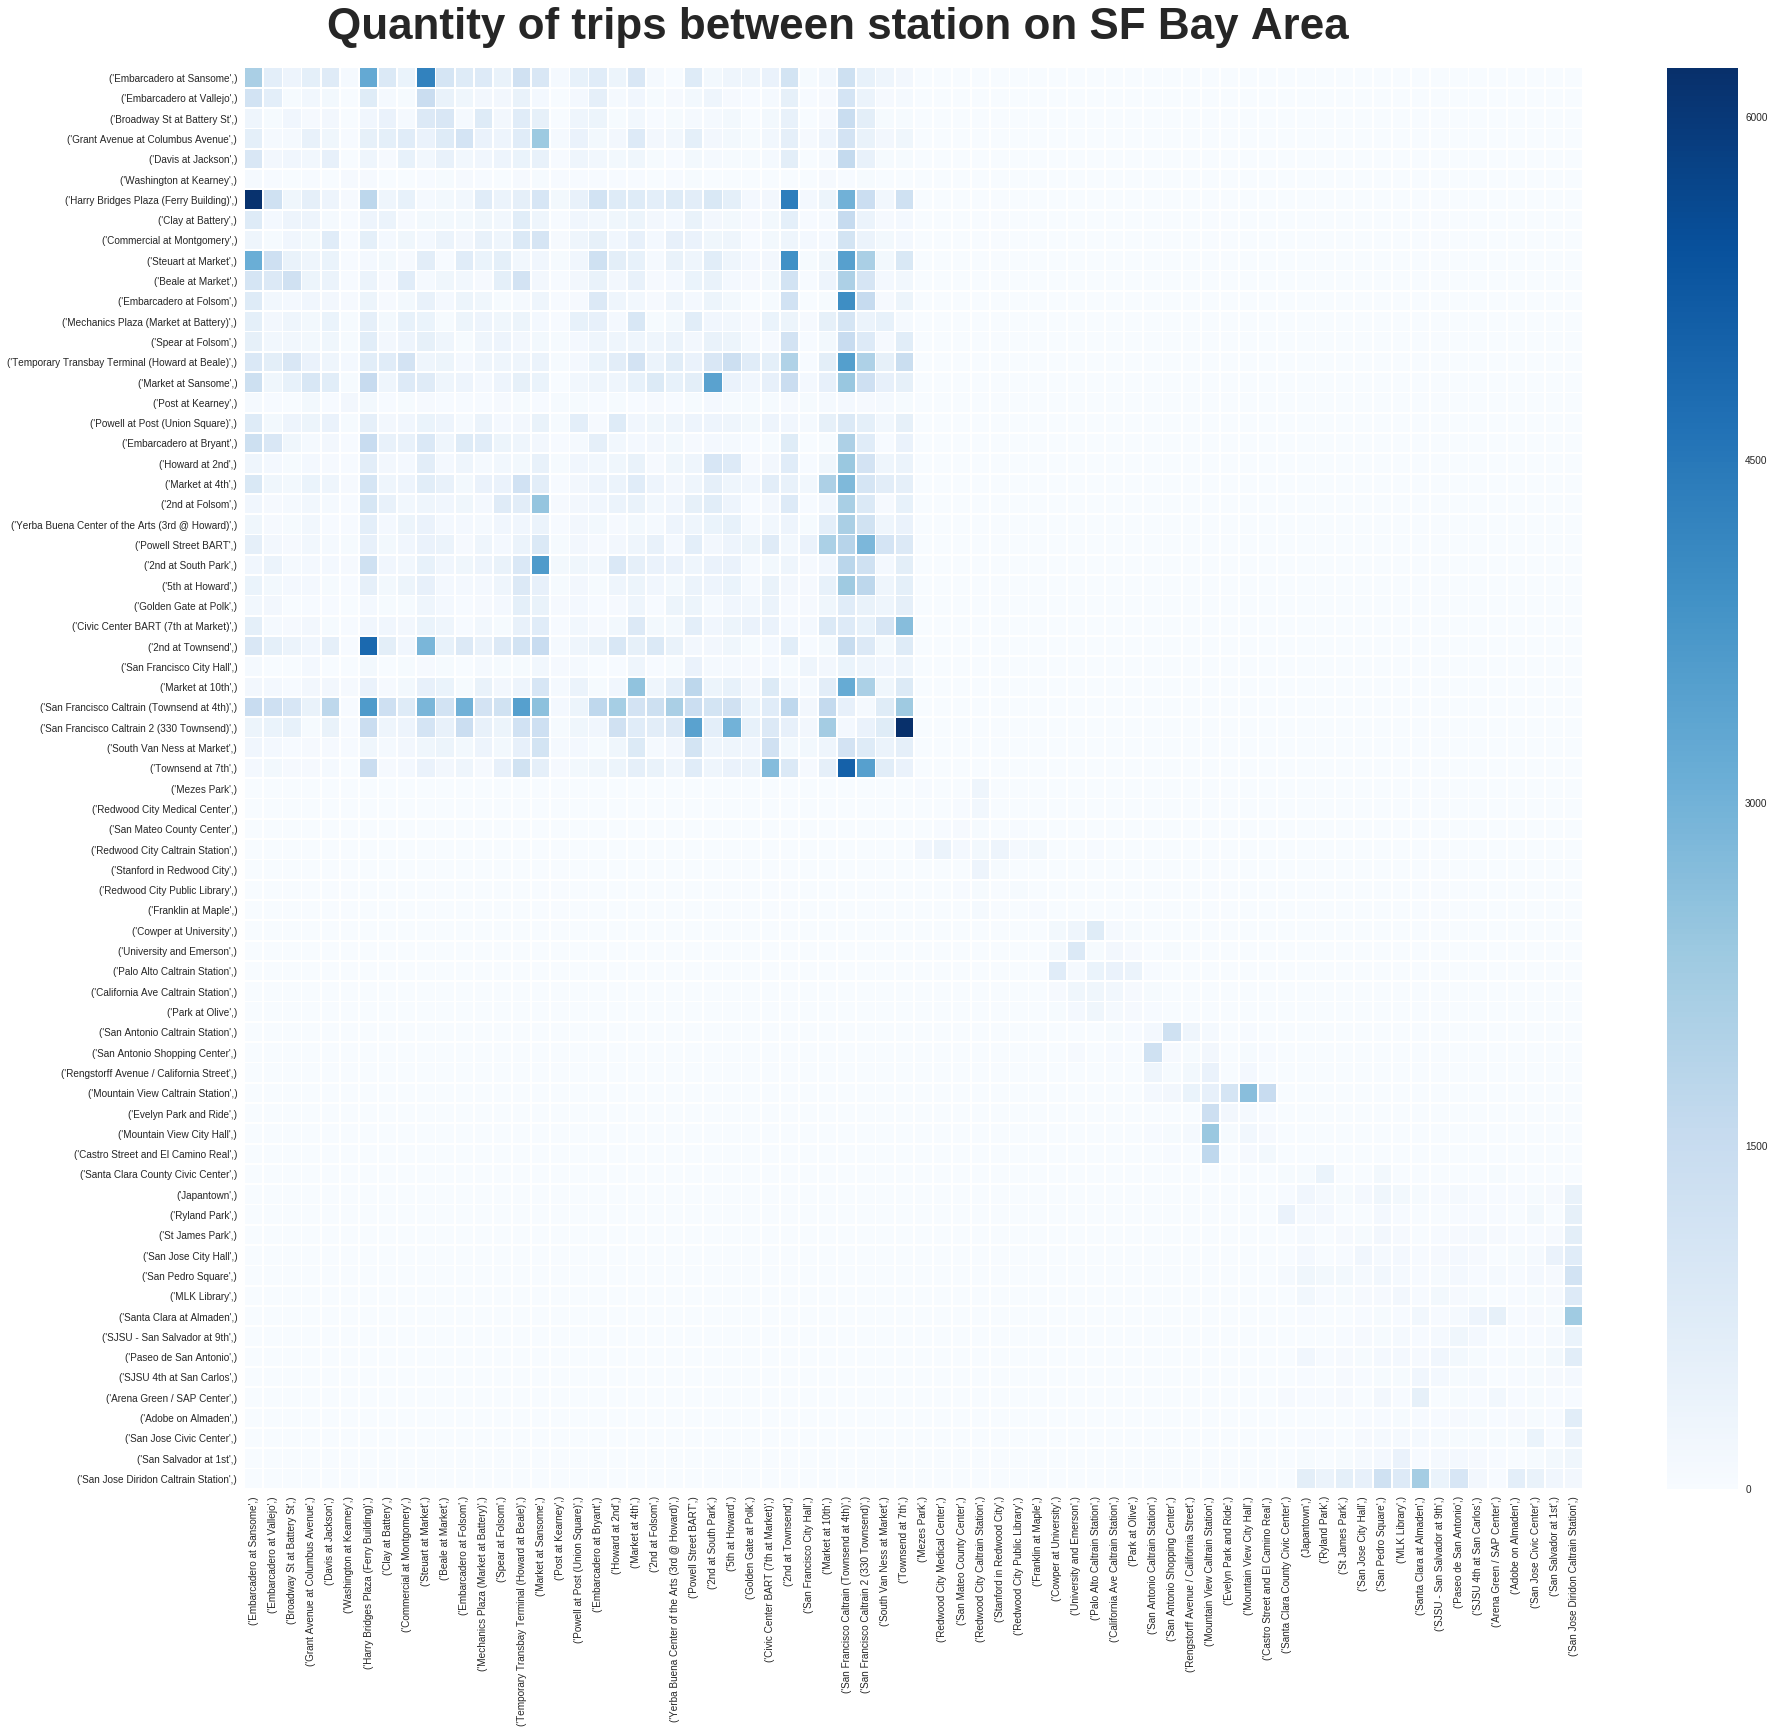

In [11]:
# get the tick label font size
fontsize_pt = plt.rcParams['ytick.labelsize']
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * 70
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(30,figure_height), 
        gridspec_kw=dict(top=2,wspace = 12))

fig.suptitle('Quantity of trips between station on SF Bay Area', fontsize=44, fontweight='bold',x= 0.4,y=2.08)

# let seaborn do it's thing
ax = sns.heatmap(matrix,cmap='Blues', linewidths=.8, ax=ax)

## Como la diferencia de viajes entre estaciones es muy amplia, voy a robustecer los valores para que se entienda mejor visualmente, entre que estaciones se viaja mas

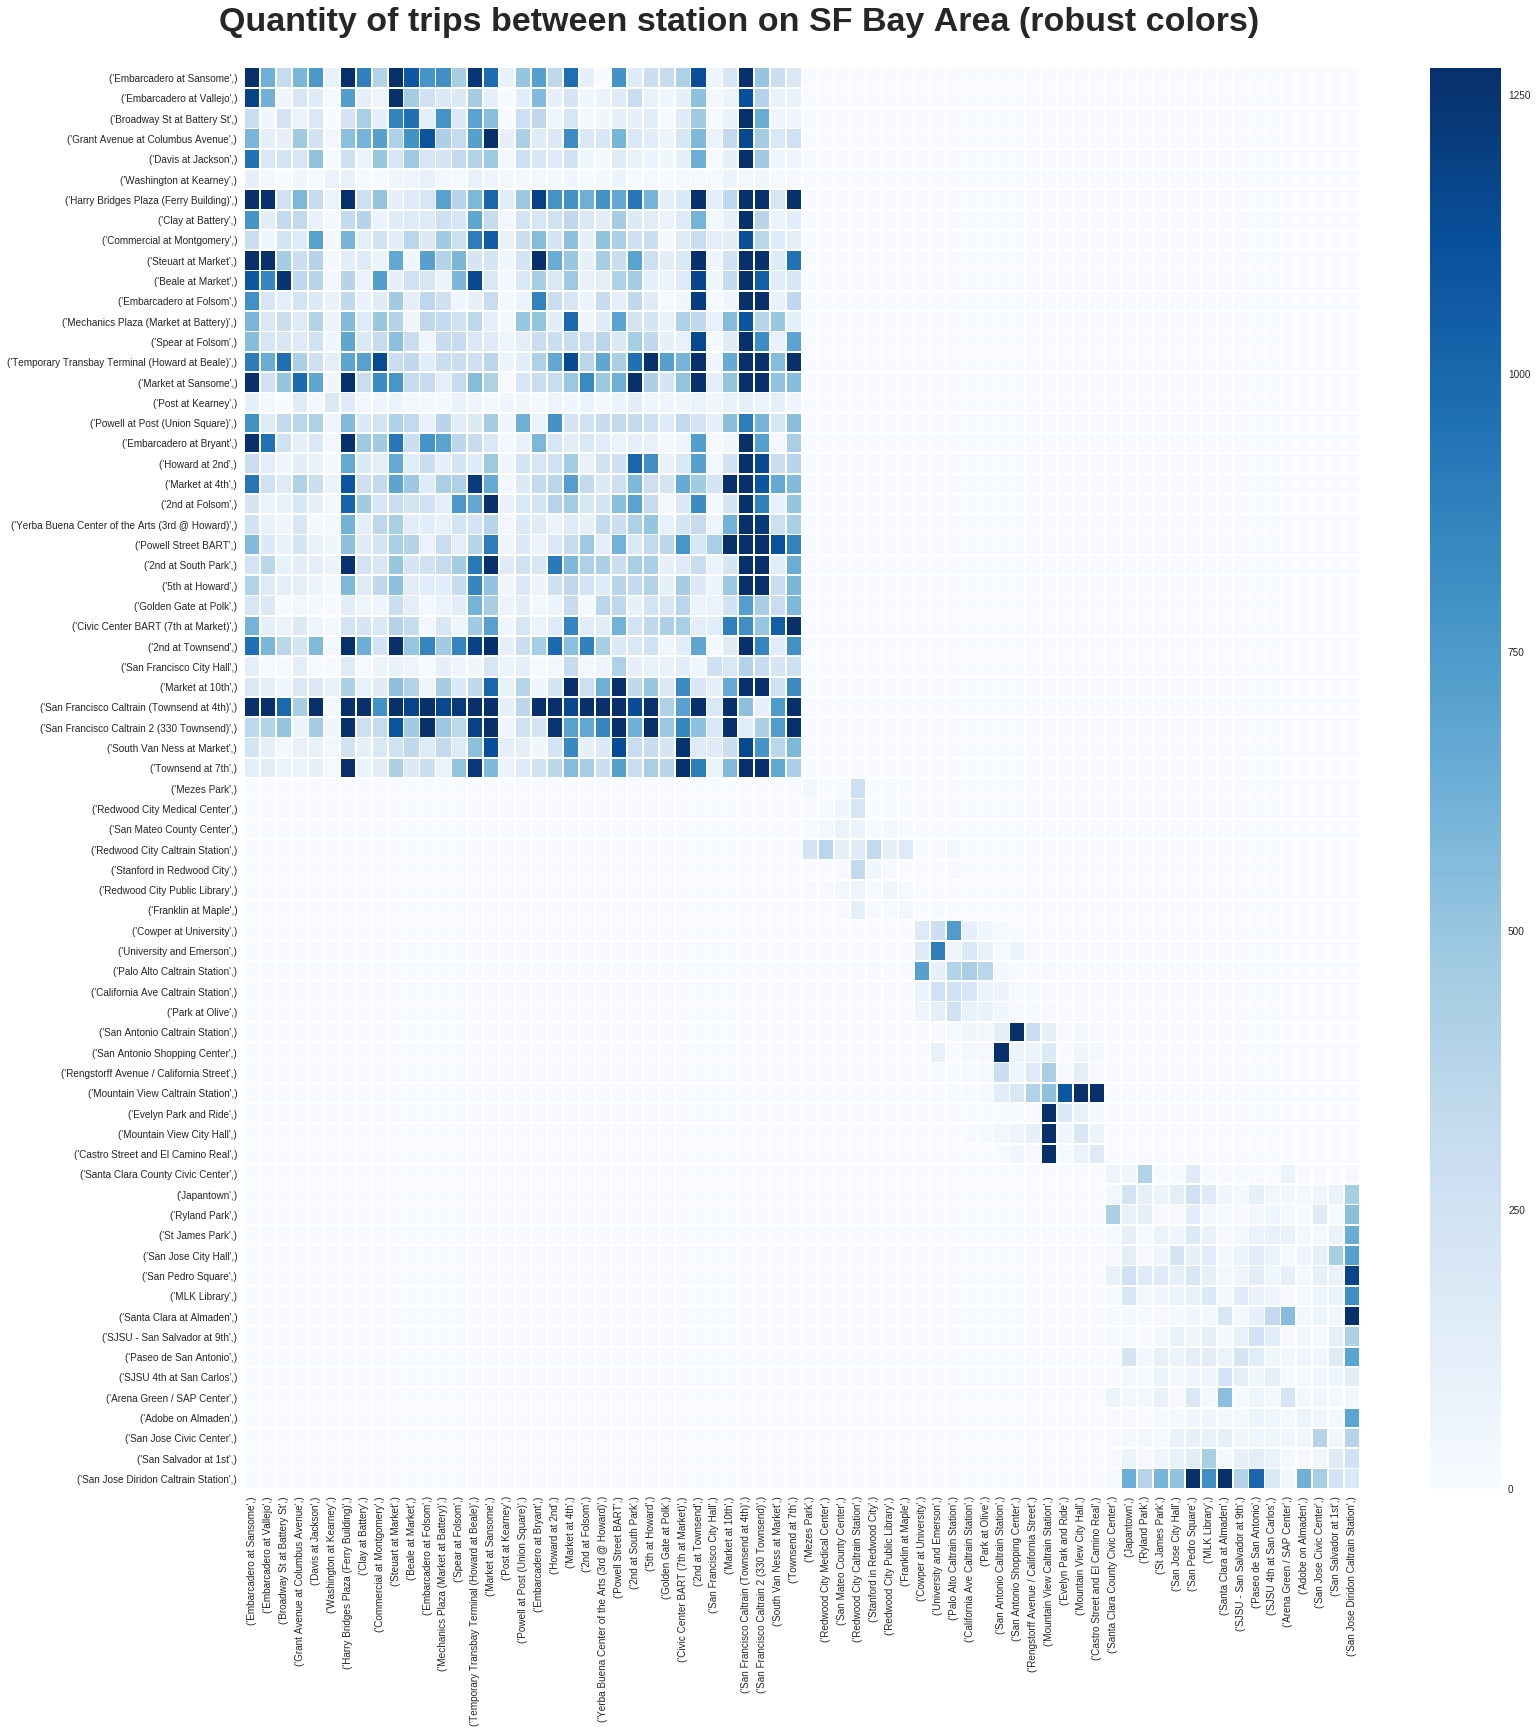

In [12]:
# get the tick label font size
fontsize_pt = plt.rcParams['ytick.labelsize']
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * 70
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(25,figure_height), 
        gridspec_kw=dict(top=2,wspace = 12))


fig.suptitle('Quantity of trips between station on SF Bay Area (robust colors)', fontsize=34, fontweight='bold',x= 0.4,y=2.08)
# let seaborn do it's thing
ax = sns.heatmap(matrix,cmap='Blues', robust= True, linewidths=.8, ax=ax, xticklabels=True)

Se puede ver perfectamente que mientras mas al notre y mas al oeste, mas se viaja entre si. Mientras que al sur este la frecuencia de muchos viajes entre estaciones es mas bien aislada, siendo la mucho menor la frecuencia de viajes en esta zona


# Analisis por sectores

## Sector Noroeste

In [13]:
matrix_nor_west = matrix.iloc[:35,:36]

## Analizare el resultado con la diferencia real de viajes entre las estaciones

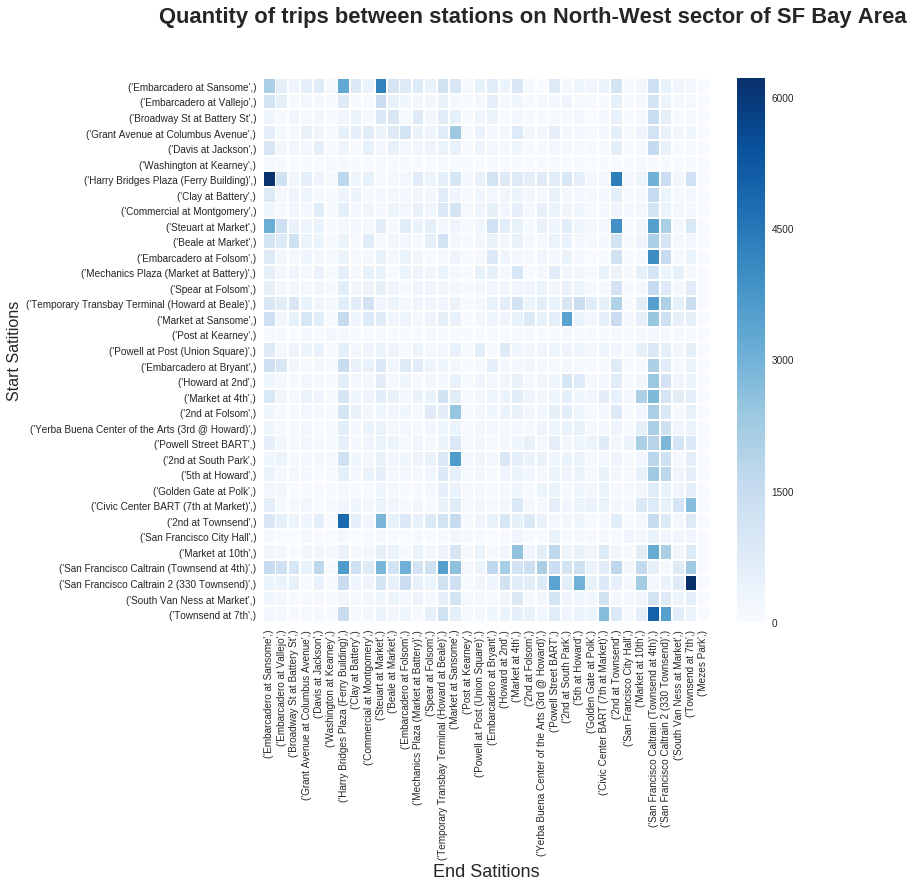

In [14]:
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_nor_west,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on North-West sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Satitions', fontsize=18)
plt.ylabel('Start Satitions', fontsize=16)

Si bien la diferencia entre los distintos valores de las estaciones es muy grande, se ve claramente que hay una gran
cantidad de viajes en todo este sector de Fc Bay Area

In [15]:
description = matrix_nor_west.describe()
description

,"(Embarcadero at Sansome,)","(Embarcadero at Vallejo,)","(Broadway St at Battery St,)","(Grant Avenue at Columbus Avenue,)","(Davis at Jackson,)","(Washington at Kearney,)","(Harry Bridges Plaza (Ferry Building),)","(Clay at Battery,)","(Commercial at Montgomery,)","(Steuart at Market,)",...,"(Golden Gate at Polk,)","(Civic Center BART (7th at Market),)","(2nd at Townsend,)","(San Francisco City Hall,)","(Market at 10th,)","(San Francisco Caltrain (Townsend at 4th),)","(San Francisco Caltrain 2 (330 Townsend),)","(South Van Ness at Market,)","(Townsend at 7th,)","(Mezes Park,)"
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,862.457143,346.885714,257.857143,251.885714,292.742857,50.628571,931.828571,278.742857,317.714286,704.914286,...,167.857143,402.428571,807.685714,94.685714,498.714286,1780.885714,986.228571,312.257143,749.485714,0.028571
std,1114.908578,374.436500,291.876499,192.419085,320.461096,38.490706,1046.711671,272.823078,261.432206,893.714172,...,159.738968,491.463318,960.441711,86.202147,587.649984,1148.163694,787.854349,282.394628,1115.860638,0.169031
min,108.000000,15.000000,3.000000,39.000000,23.000000,1.000000,95.000000,17.000000,13.000000,48.000000,...,14.000000,18.000000,16.000000,9.000000,51.000000,41.000000,51.000000,16.000000,18.000000,0.000000
25%,238.500000,121.000000,71.500000,130.500000,97.500000,27.000000,301.500000,105.500000,136.500000,273.000000,...,58.500000,149.500000,219.000000,35.500000,144.000000,1101.000000,431.000000,108.000000,195.500000,0.000000
50%,589.000000,182.000000,162.000000,202.000000,188.000000,37.000000,576.000000,175.000000,231.000000,424.000000,...,107.000000,193.000000,536.000000,74.000000,249.000000,1575.000000,784.000000,212.000000,507.000000,0.000000
75%,952.500000,490.000000,326.000000,339.500000,395.500000,72.500000,1175.500000,342.500000,432.500000,678.000000,...,223.000000,488.000000,1008.500000,129.500000,561.000000,2352.500000,1293.000000,432.000000,746.000000,0.000000
max,6164.000000,1290.000000,1254.000000,984.000000,1700.000000,186.000000,4839.000000,1294.000000,1142.000000,4269.000000,...,717.000000,2698.000000,4357.000000,433.000000,2230.000000,5041.000000,3495.000000,1114.000000,6216.000000,1.000000


In [16]:
# Cantidad de viajes a cada estacion
matrix_nor_west.sum().sort_values(ascending=False)

(San Francisco Caltrain (Townsend at 4th),)         62331
(San Francisco Caltrain 2 (330 Townsend),)          34518
(Harry Bridges Plaza (Ferry Building),)             32614
(Embarcadero at Sansome,)                           30186
(2nd at Townsend,)                                  28269
(Market at Sansome,)                                27817
(Townsend at 7th,)                                  26232
(Steuart at Market,)                                24672
(Temporary Transbay Terminal (Howard at Beale),)    22694
(Market at 4th,)                                    19573
(Powell Street BART,)                               19329
(Market at 10th,)                                   17455
(2nd at South Park,)                                16366
(5th at Howard,)                                    14659
(Civic Center BART (7th at Market),)                14085
(Howard at 2nd,)                                    13731
(Embarcadero at Folsom,)                            13353
(Embarcadero a

In [17]:
matrix_nor_west.shape

(35, 36)

Donde la media de los viajes en el sector es de: 

In [18]:
all_trips = 0
counter = 0
for x in range(0, 35):
    for y in range(0, 36):
        all_trips = all_trips + matrix_nor_west.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  580654
Mean of trips in the region:  460.836507937


Y las estaciones del sector a las que mas se viaja son: 

1) San Francisco Caltrain (Townsend at 4th) con un promedio de 1781 viajes

2) San Francisco Caltrain 2 (330 Townsend) con un promedio de 987 viajes

3) Harry Bridges Plaza (Ferry Building) con un promedio de 932 viajes

Abajo mostrare cuanto se viaja en promedio a cada estacion

In [19]:
matrix_nor_west.mean()

(Embarcadero at Sansome,)                            862.457143
(Embarcadero at Vallejo,)                            346.885714
(Broadway St at Battery St,)                         257.857143
(Grant Avenue at Columbus Avenue,)                   251.885714
(Davis at Jackson,)                                  292.742857
(Washington at Kearney,)                              50.628571
(Harry Bridges Plaza (Ferry Building),)              931.828571
(Clay at Battery,)                                   278.742857
(Commercial at Montgomery,)                          317.714286
(Steuart at Market,)                                 704.914286
(Beale at Market,)                                   339.457143
(Embarcadero at Folsom,)                             381.514286
(Mechanics Plaza (Market at Battery),)               333.571429
(Spear at Folsom,)                                   325.685714
(Temporary Transbay Terminal (Howard at Beale),)     648.400000
(Market at Sansome,)                    

## Sector Sureste

In [20]:
matrix_sud_east = matrix.ix[54:,54:]

## Hare un analisis con los datos reales de la matriz 

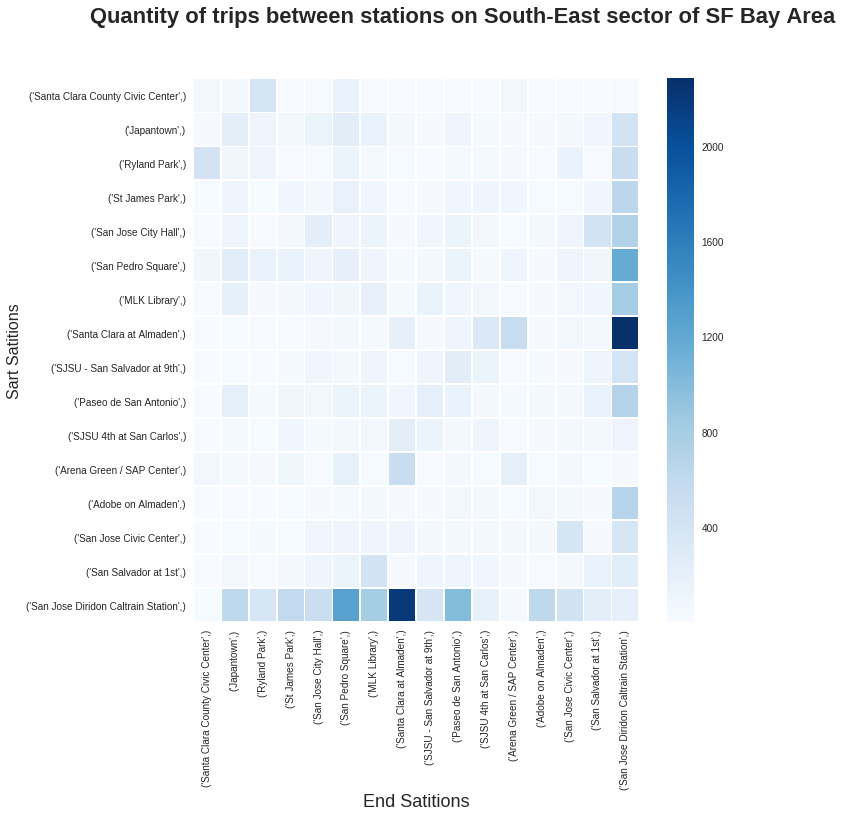

In [21]:
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_sud_east,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on South-East sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Satitions', fontsize=18)
plt.ylabel('Sart Satitions', fontsize=16)

In [22]:
matrix_sud_east.describe()

,"(Santa Clara County Civic Center,)","(Japantown,)","(Ryland Park,)","(St James Park,)","(San Jose City Hall,)","(San Pedro Square,)","(MLK Library,)","(Santa Clara at Almaden,)","(SJSU - San Salvador at 9th,)","(Paseo de San Antonio,)","(SJSU 4th at San Carlos,)","(Arena Green / SAP Center,)","(Adobe on Almaden,)","(San Jose Civic Center,)","(San Salvador at 1st,)","(San Jose Diridon Caltrain Station,)"
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,52.062500,136.750000,90.062500,92.687500,103.375000,197.50000,156.750000,231.562500,91.875000,156.000000,89.812500,85.375000,73.000000,111.562500,106.625000,588.125000
std,103.884852,155.997222,126.356885,139.460732,123.783615,293.08952,199.588744,541.719235,99.333026,233.655587,78.591958,134.861349,148.985905,126.558007,106.551318,548.320694
min,3.000000,17.000000,3.000000,12.000000,12.000000,45.00000,13.000000,8.000000,5.000000,5.000000,4.000000,17.000000,7.000000,9.000000,3.000000,17.000000
25%,9.000000,39.500000,16.500000,23.500000,32.750000,87.25000,47.750000,32.000000,33.250000,62.500000,47.000000,27.000000,26.750000,49.000000,34.500000,243.500000
50%,15.500000,84.500000,37.000000,58.000000,77.500000,134.00000,106.000000,43.000000,55.500000,98.000000,61.500000,35.000000,32.000000,60.500000,88.500000,492.000000
75%,43.000000,206.250000,121.750000,90.750000,105.000000,176.25000,144.250000,138.000000,112.000000,140.250000,104.750000,75.000000,54.500000,119.000000,130.000000,700.250000
max,427.000000,634.000000,399.000000,595.000000,519.000000,1274.00000,808.000000,2200.000000,392.000000,1007.000000,330.000000,554.000000,627.000000,448.000000,435.000000,2283.000000


In [23]:
matrix_sud_east.shape

(16, 16)

Donde la media del sector es:

In [24]:
all_trips = 0
counter = 0
for x in range(0, 16):
    for y in range(0, 16):
        all_trips = all_trips + matrix_sud_east.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  37810
Mean of trips in the region:  147.6953125


## Sector Centro

In [26]:
matrix_center = matrix.ix[35:54,36:54]

## Analisis con los datos reales de los viajes

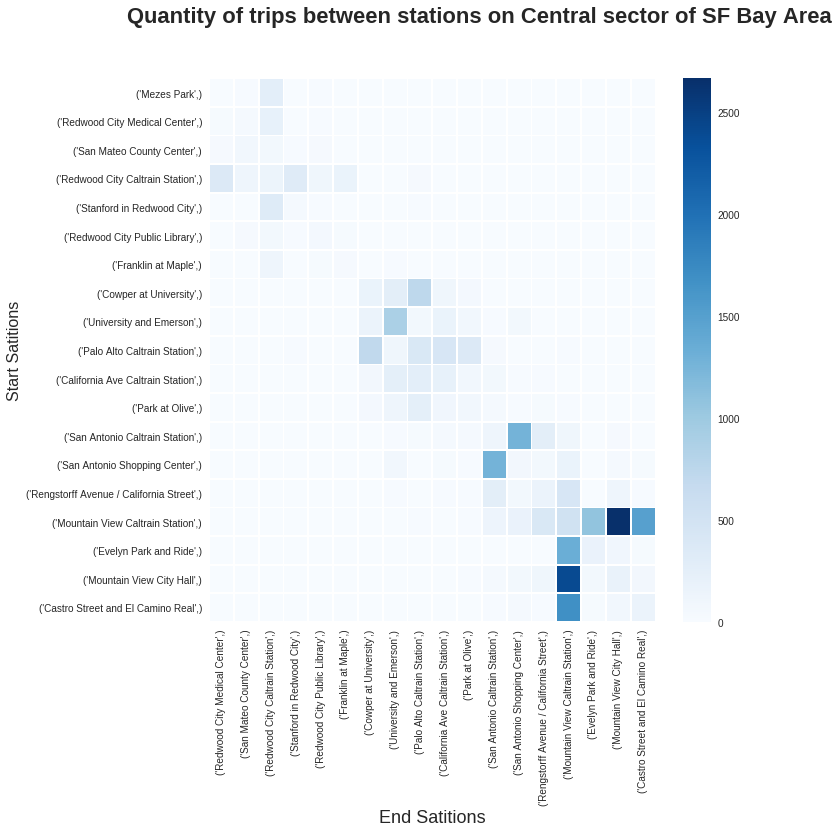

In [27]:
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_center,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on Central sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Satitions', fontsize=18)
plt.ylabel('Start Satitions', fontsize=16)

In [28]:
matrix_center.describe()

,"(Redwood City Medical Center,)","(San Mateo County Center,)","(Redwood City Caltrain Station,)","(Stanford in Redwood City,)","(Redwood City Public Library,)","(Franklin at Maple,)","(Cowper at University,)","(University and Emerson,)","(Palo Alto Caltrain Station,)","(California Ave Caltrain Station,)","(Park at Olive,)","(San Antonio Caltrain Station,)","(San Antonio Shopping Center,)","(Rengstorff Avenue / California Street,)","(Mountain View Caltrain Station,)","(Evelyn Park and Ride,)","(Mountain View City Hall,)","(Castro Street and El Camino Real,)"
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,23.368421,17.368421,65.315789,22.894737,14.421053,13.000000,63.526316,95.789474,95.684211,59.789474,42.157895,109.105263,96.210526,57.315789,353.157895,72.105263,172.842105,95.526316
std,84.723216,35.845673,104.826339,75.728238,27.645204,38.499639,166.033922,211.769943,192.849986,109.887609,85.006708,291.905216,288.583048,110.182703,687.243388,248.226799,606.298905,339.976203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,4.000000,6.000000,12.000000,12.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.000000
75%,3.500000,10.000000,94.000000,8.500000,14.500000,3.500000,32.000000,101.000000,51.000000,76.000000,49.000000,59.500000,65.000000,47.000000,303.000000,6.000000,69.500000,21.500000
max,371.000000,134.000000,337.000000,332.000000,110.000000,167.000000,712.000000,894.000000,739.000000,429.000000,366.000000,1278.000000,1272.000000,399.000000,2401.000000,1082.000000,2666.000000,1490.000000


In [29]:
matrix_center.shape

(19, 18)

Donde la media del sector es:

In [30]:
all_trips = 0
counter = 0
for x in range(0, 19):
    for y in range(0, 18):
        all_trips = all_trips + matrix_center.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  27922
Mean of trips in the region:  81.6432748538
